In [1]:
from TestEnv import Electric_Car
import argparse
import matplotlib.pyplot as plt
import numpy as np

class QLearningAgent:
    def __init__(self, action_space_size):
        self.action_space_size = action_space_size
        self.learning_rate = 0.1
        self.discount_factor = 0.9
        self.epsilon = 0.1
        self.q_table = {}

    def get_q_value(self, state, action):
        state_action = tuple(state + [action])
        return self.q_table.get(state_action, 0.0)

    def update_q_value(self, state, action, new_q_value):
        state_action = tuple(state + [action])
        self.q_table[state_action] = new_q_value

    def choose_action(self, state):
        actions = [-1, 0, 1]
        if np.random.rand() < self.epsilon:
            return np.random.choice(actions)
        else:
            q_values = [self.get_q_value(state, a) for a in actions]
            index = np.argmax(q_values)
            return actions[index]

Simulation:  0
Simulation:  1
Simulation:  2
Simulation:  3
Simulation:  4
Simulation:  5
Simulation:  6
Simulation:  7
Simulation:  8
Simulation:  9
Simulation:  10
Simulation:  11
Simulation:  12
Simulation:  13
Simulation:  14
Simulation:  15
Simulation:  16
Simulation:  17
Simulation:  18
Simulation:  19
Simulation:  20
Simulation:  21
Simulation:  22
Simulation:  23
Simulation:  24
Simulation:  25
Simulation:  26
Simulation:  27
Simulation:  28
Simulation:  29
Simulation:  30
Simulation:  31
Simulation:  32
Simulation:  33
Simulation:  34
Simulation:  35
Simulation:  36
Simulation:  37
Simulation:  38
Simulation:  39
Simulation:  40
Simulation:  41
Simulation:  42
Simulation:  43
Simulation:  44
Simulation:  45
Simulation:  46
Simulation:  47
Simulation:  48
Simulation:  49
Simulation:  50
Simulation:  51
Simulation:  52
Simulation:  53
Simulation:  54
Simulation:  55
Simulation:  56
Simulation:  57
Simulation:  58
Simulation:  59
Simulation:  60
Simulation:  61
Simulation:  62
Si

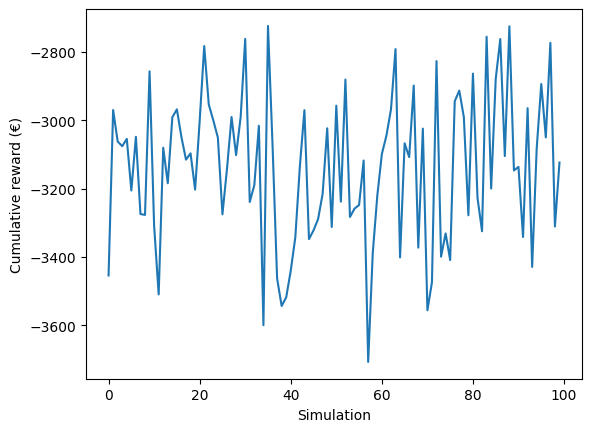

In [2]:
# Modify the argument parsing to allow running in Jupyter notebooks
class JupyterArgumentParser(argparse.ArgumentParser):
    def error(self, message):
        print(message)

# Make the excel file as a command line argument, so that you can do: " python3 main.py --excel_file validate.xlsx "
parser = JupyterArgumentParser()
parser.add_argument('--excel_file', type=str, default='validate.xlsx')  # Path to the excel file with the test data
args, unknown_args = parser.parse_known_args()

# Initialize Q-learning agent
ql_agent = QLearningAgent(action_space_size=3)
end_reward = []

for simulation in range(100):
    print('Simulation: ', simulation)
    env = Electric_Car(path_to_test_data=args.excel_file)
    total_reward = []
    cumulative_reward = []
    battery_level = []

    observation = env.observation()
    for i in range(730 * 24 - 1):  # Loop through 2 years -> 730 days * 24 hours
        # Choose an action based on the observation using your Q-learning agent
        action = ql_agent.choose_action(observation)

        next_observation, reward, terminated, truncated, info = env.step(action)

        # Update Q-value using Q-learning update rule
        next_max_q_value = max([ql_agent.get_q_value(next_observation, a) for a in [-1, 0, 1]])
        current_q_value = ql_agent.get_q_value(observation, action)
        new_q_value = current_q_value + ql_agent.learning_rate * (reward + ql_agent.discount_factor * next_max_q_value - current_q_value)
        ql_agent.update_q_value(observation, action, new_q_value)

        total_reward.append(reward)
        cumulative_reward.append(sum(total_reward))
        done = terminated or truncated
        observation = next_observation

        if done:
            end_reward.append(sum(total_reward))
            break

        
plt.plot(end_reward)
plt.xlabel('Simulation')
plt.ylabel('Cumulative reward (€)')
plt.show()

In [15]:
env.observation()

array([   0.  ,   31.46,   24.  ,    5.  ,  365.  ,   12.  , 2011.  ])